# Proyecto final de Python para Data Science
## Estudiante: Erick J. Pineda Amézquita
## Carnet:        17012140

Problema a resolver:

Crear un modelo lineal univariable para predecir el precio de casas en base a variables obtenidas, según los valores proporcionados en el archivo: "proyecto_training_data.npy"


#### Importar paquetes/librerías a utilizar:

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import lmplot
import sklearn as sl
from sklearn.linear_model import LinearRegression


Extracción de los datos a partir del archivo .npy

In [2]:
origenDeDatos = np.load('proyecto_training_data.npy')
type(origenDeDatos)

##np.savetxt("data.txt", OrigenDeDatos.tolist())
##OrigenDeDatos.tolist()


numpy.ndarray

### Separación de los datos en 80% y 20%

In [3]:
numDatosEntrenamiento=int(0.8*origenDeDatos.shape[0])
print("Cantidad de datos para ENTRENAMIENTO:   ", numDatosEntrenamiento)

numDatosValidacion=int(0.2*origenDeDatos.shape[0])
print("Cantidad de datos para VALIDACION:      ", numDatosValidacion)


Cantidad de datos para ENTRENAMIENTO:    1168
Cantidad de datos para VALIDACION:       292


#### Creación de Data Frames

In [4]:
dfEntrenamiento = pd.DataFrame(origenDeDatos[:numDatosEntrenamiento])
dfEntrenamiento.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

dfValidacion = pd.DataFrame(origenDeDatos[numDatosEntrenamiento:])
dfValidacion.columns = ["SalePrice", "Overall", "Floor", "Rooms", "Year", "Front"]

print("Data Frame de Entrenamiento:   ",dfEntrenamiento.shape)
print("Data Frame de Validacion:      ",dfValidacion.shape)


Data Frame de Entrenamiento:    (1168, 6)
Data Frame de Validacion:       (292, 6)


#### Presentación de datos para ver como vienen

In [5]:
dfEntrenamiento.head(2)

,SalePrice,Overall,Floor,Rooms,Year,Front
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0


#### Analitica de datos por medio de estadística

In [6]:
dfEntrenamiento.describe()

,SalePrice,Overall,Floor,Rooms,Year,Front
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


#### Media, minimo, maximo, rangos

In [7]:
dfEntrenamiento.mean(axis=0)


SalePrice    180590.277397
Overall           6.101027
Floor          1156.323630
Rooms             6.485445
Year           1971.451199
Front            69.946985
dtype: float64

In [8]:
dfEntrenamiento.min(axis=0)


SalePrice    34900.0
Overall          1.0
Floor          334.0
Rooms            2.0
Year          1875.0
Front           21.0
dtype: float64

In [9]:
dfEntrenamiento.max(axis=0)


SalePrice    755000.0
Overall          10.0
Floor          3228.0
Rooms            14.0
Year           2010.0
Front           313.0
dtype: float64

In [10]:
dfEntrenamiento.std(axis=0)


SalePrice    78815.697902
Overall          1.378025
Floor          373.780374
Rooms            1.609141
Year            29.951707
Front           23.478161
dtype: float64

#### Correlación entre todas las variables

In [11]:
dfEntrenamiento.corr()


,SalePrice,Overall,Floor,Rooms,Year,Front
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
Overall,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
Floor,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
Rooms,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
Year,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
Front,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


#### Rangos


In [12]:
print ("Intervalo SalePrice:   [", dfEntrenamiento["SalePrice"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Overall:     [", dfEntrenamiento["Overall"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Floor:       [", dfEntrenamiento["Floor"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Rooms:       [", dfEntrenamiento["Rooms"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Year:        [", dfEntrenamiento["Year"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")
print ("Intervalo Front:       [", dfEntrenamiento["Front"].min(),"  -   ",dfEntrenamiento["SalePrice"].max(), "]")



Intervalo SalePrice:   [ 34900.0   -    755000.0 ]
Intervalo Overall:     [ 1.0   -    755000.0 ]
Intervalo Floor:       [ 334.0   -    755000.0 ]
Intervalo Rooms:       [ 2.0   -    755000.0 ]
Intervalo Year:        [ 1875.0   -    755000.0 ]
Intervalo Front:       [ 21.0   -    755000.0 ]


##  Graficas de cada Variable. Histogramas

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


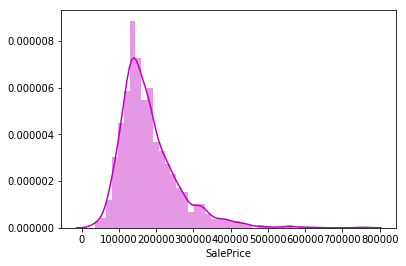

In [13]:
#sns.distplot(dfEntrenamiento["SalePrice"], hist=False, color="g", kde_kws={"shade": True})
sns.distplot(dfEntrenamiento["SalePrice"], color="m")


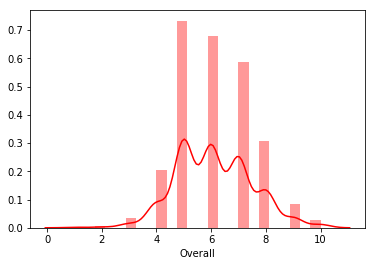

In [14]:
sns.distplot(dfEntrenamiento["Overall"], color="r")


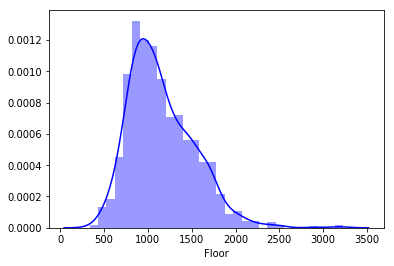

In [15]:
sns.distplot(dfEntrenamiento["Floor"], color="b")


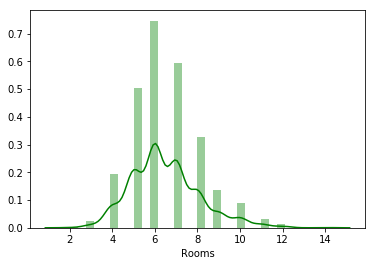

In [16]:
sns.distplot(dfEntrenamiento["Rooms"], color="g")


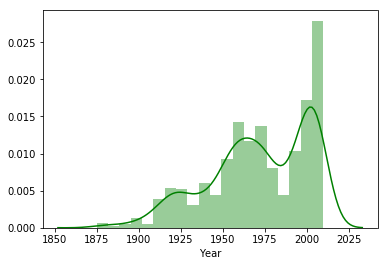

In [17]:
sns.distplot(dfEntrenamiento["Year"], color="g",bins=20)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


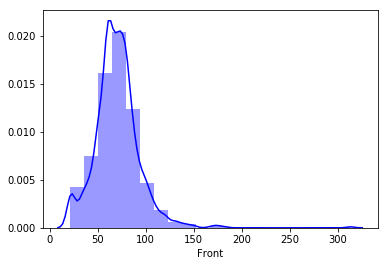

In [18]:
sns.distplot(dfEntrenamiento["Front"], color="b",bins=20)



# Graficas X,Y para observar el comportamiento del precio y sus variables

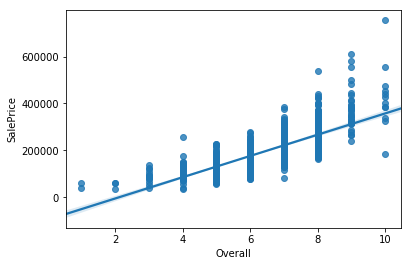

In [19]:
ax = sns.regplot(x="Overall", y="SalePrice", data=dfEntrenamiento)

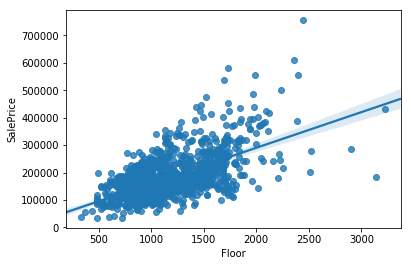

In [20]:
ax = sns.regplot(x="Floor", y="SalePrice", data=dfEntrenamiento)

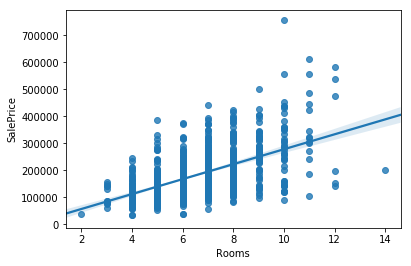

In [21]:
ax = sns.regplot(x="Rooms", y="SalePrice", data=dfEntrenamiento)

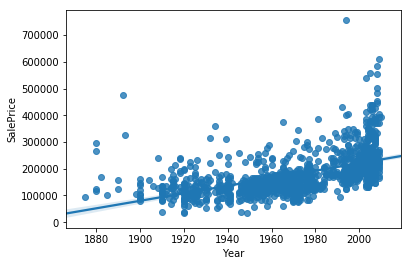

In [22]:
ax = sns.regplot(x="Year", y="SalePrice", data=dfEntrenamiento)

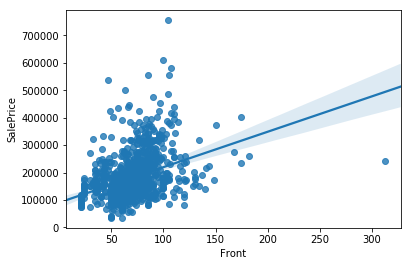

In [23]:
ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)

### Funcion de entrenamiento manual

## Se tomarán las 2 variables: Overall y Floor, segun la tendencia de las mismas

In [24]:
def regresionLineal(argX, argY, EPOCHS, imprimir_error_cada, lr):
    #mb=np.array([0.1,0.2])
    #mb=np.array([[0.1,0.2]])
    count=0
    
    mb=np.array([27000.0, 96199.0])
    unos = np.ones_like(argX)
    arrXUnos=np.column_stack((argX,unos))
    vectorDeErrores=[]
    vectorModeloMB=[]
    
    ##vectorModeloMB = np.ones(shape = (0, 2), dtype = float)
    #arrError=np.ndarray([])
    
    while count < EPOCHS:
        #yhat=np.dot(arrXUnos,mb)
        yhat=np.matmul(arrXUnos,mb)
        ##arrError= 0.5*(np.mean(argY-yhat)**2)
        arrError= 0.5*(np.mean(np.power(argY-yhat,2)))
        
        ##gradiente = np.mean(np.dot(np.transpose(yhat - argY),arrXUnos))
        #gradiente = np.mean(np.dot((yhat - argY),arrXUnos))
        
        ndToArr=np.array([np.dot((yhat - argY),arrXUnos)])
        gradiente = ndToArr.mean(axis=0)
        
        mb-= lr * gradiente  
        #mb[0] = mb[0]-lr * gradiente
        #mb[1] = mb[1]-lr * gradiente
        
        ## Codigo que estaba dando el error, al aplicaro de esta manejra, la variable es por referencia.
        vectorDeErrores.append(arrError)
        
        ### Se utilizó list ya que de lo contrario los valores van cambiando porque la variable se va por referencia.
        vectorModeloMB.append(list(mb))
        
        
        #vectorModeloMB=np.append(vectorDeErrores,np.ndarray(mb))
        #vectorModeloMB=np.append(vectorModeloMB, [[mb[0], mb[1]]], axis = 0)
        
        
        if ((count % imprimir_error_cada == 0)):
            print("*Iteracion:", count, " Argumentos: ", 
                  mb , " *Error:", arrError, " *Gradiente: ",gradiente)
        count+=1
        

    
    return vectorModeloMB,vectorDeErrores
    
regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 50, 10, 0.0001)



*Iteracion: 0  Argumentos:  [-26167.5191  86815.7012]  *Error: 4695488468.14298  *Gradiente:  [5.31675191e+08 9.38329880e+07]
*Iteracion: 10  Argumentos:  [-1.91265569e+10 -2.98646002e+09]  *Error: 5.543017692135422e+20  *Gradiente:  [2.43233493e+14 3.79800118e+13]
*Iteracion: 20  Argumentos:  [-8.72307910e+15 -1.36207622e+15]  *Error: 1.1529527307306939e+32  *Gradiente:  [1.10931784e+20 1.73215838e+19]
*Iteracion: 30  Argumentos:  [-3.97834488e+21 -6.21203696e+20]  *Error: 2.3981521855686194e+43  *Gradiente:  [5.05927886e+25 7.89987499e+24]
*Iteracion: 40  Argumentos:  [-1.81440840e+27 -2.83313096e+26]  *Error: 4.988178397827905e+54  *Gradiente:  [2.30739122e+31 3.60290522e+30]


([[-26167.519100000005, 86815.7012],
  [170284.52879659992, 116415.5458105],
  [-551984.969825386, 2566.39923937642],
  [2107068.2265027817, 416704.0777057857],
  [-7678738.951506868, -1112370.8323761313],
  [28338382.80916962, 4510516.402089195],
  [-104220797.62231687, -16189150.559089119],
  [383660011.85028064, 59990575.55627573],
  [-1411969846.149125, -220391355.1688081],
  [5196792406.857045, 811541160.4251765],
  [-19126556937.184887, -2986460023.2944117],
  [70394797185.08841, 10991964073.808716],
  [-259085844959.7252, -40455208711.16169],
  [953557718310.1129, 148894553877.5467],
  [-3509540328533.306, -548001538990.1922],
  [12916757376037.79, 2016903499969.639],
  [-47539735721880.195, -7423152113898.404],
  [174968563073650.97, 27320687749509.6],
  [-643966517274023.0, -100552966604823.84],
  [2370099337595794.5, 370082160125181.25],
  [-8723079102913364.0, -1362076224127111.0],
  [3.2105029451570108e+16, 5013080447608093.0],
  [-1.1816159224537075e+17, -1.84504913358403e

### Función para Overall

In [25]:
resultadoOverall=regresionLineal(dfEntrenamiento["Overall"], dfEntrenamiento["SalePrice"], 50, 10, 0.0001)
print(resultadoOverall)

*Iteracion: 0  Argumentos:  [-26167.5191  86815.7012]  *Error: 4695488468.14298  *Gradiente:  [5.31675191e+08 9.38329880e+07]
*Iteracion: 10  Argumentos:  [-1.91265569e+10 -2.98646002e+09]  *Error: 5.543017692135422e+20  *Gradiente:  [2.43233493e+14 3.79800118e+13]
*Iteracion: 20  Argumentos:  [-8.72307910e+15 -1.36207622e+15]  *Error: 1.1529527307306939e+32  *Gradiente:  [1.10931784e+20 1.73215838e+19]
*Iteracion: 30  Argumentos:  [-3.97834488e+21 -6.21203696e+20]  *Error: 2.3981521855686194e+43  *Gradiente:  [5.05927886e+25 7.89987499e+24]
*Iteracion: 40  Argumentos:  [-1.81440840e+27 -2.83313096e+26]  *Error: 4.988178397827905e+54  *Gradiente:  [2.30739122e+31 3.60290522e+30]
([[-26167.519100000005, 86815.7012], [170284.52879659992, 116415.5458105], [-551984.969825386, 2566.39923937642], [2107068.2265027817, 416704.0777057857], [-7678738.951506868, -1112370.8323761313], [28338382.80916962, 4510516.402089195], [-104220797.62231687, -16189150.559089119], [383660011.85028064, 59990575.

### Función para floor

In [26]:
resultadoFloor=regresionLineal(dfEntrenamiento["Floor"], dfEntrenamiento["SalePrice"], 50, 10, 0.0000001)
print(resultadoFloor)

*Iteracion: 0  Argumentos:  [-4616330.4379483    92562.2747012]  *Error: 535130702097960.7  *Gradiente:  [4.64333044e+13 3.63672530e+10]
*Iteracion: 10  Argumentos:  [-1.01469536e+29 -7.94565566e+25]  *Error: 2.5853596122504236e+59  *Gradiente:  [1.02061278e+36 7.99199252e+32]
*Iteracion: 20  Argumentos:  [-2.23031950e+51 -1.74647008e+48]  *Error: 1.2490613785589031e+104  *Gradiente:  [2.24332611e+58 1.75665501e+55]
*Iteracion: 30  Argumentos:  [-4.90228428e+73 -3.83877414e+70]  *Error: 6.034573759158513e+148  *Gradiente:  [4.93087304e+80 3.86116080e+77]
*Iteracion: 40  Argumentos:  [-1.07753132e+96 -8.43769787e+92]  *Error: 2.91547565874941e+193  *Gradiente:  [1.08381518e+103 8.48690418e+099]
([[-4616330.4379483, 92562.2747012], [791603027.2512399, 716047.682458599], [-135740843662.12578, -106196811.47528064], [23276286029311.477, 18226783921.23083], [-3991322555430424.0, -3125437949264.404], [6.844157062462926e+17, 535937363586764.5], [-1.1736081272591793e+20, -9.190035233753283e+16]

##  Visualización de errores

In [27]:
#ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)
#type(resultadoFloor[0])

def graficar_error(arrErroresTemp):
    
    rango = np.arange(np.size(arrErroresTemp))
    
    plt.plot(rango, arrErroresTemp)
    plt.title('Comportamiento del error para ')
    plt.ylabel('Y - Error')
    plt.xlabel('X - Numero de Iteracion')    
    plt.show()

##ax = sns.regplot(x="Front", y="SalePrice", data=dfValidacion)
    

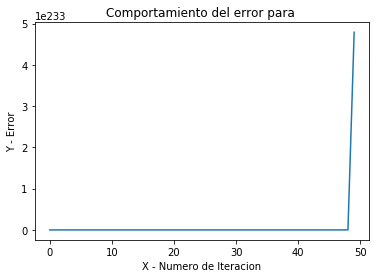

In [28]:
#ax = sns.regplot(x="Front", y="SalePrice", data=dfEntrenamiento)
#type(resultadoFloor[0])

graficar_error(resultadoFloor[1])


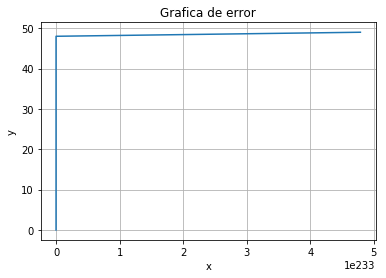

In [29]:
import matplotlib.pyplot as plt

x = resultadoFloor[1]
y = np.arange(np.size(x) )

fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

ax.grid()
ax.plot(x,y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Grafica de error')

plt.show()


## Modelo con Sk

In [ ]:
def entrenamientoSKT(x, y):
    modeloSkt = LinearRegression()    
    modeloSkt.fit(x,y)
    return np.append(modeloSkt.coef_.flatten(), modeloSkt.intercept_.flatten())



### Entrenando modelo

## Entrenamiento para Overall 

In [ ]:
serY = dfEntrenamiento["SalePrice"]
serX = dfEntrenamiento["Overall"]

xx=np.array(dfEntrenamiento["Overall"].values.tolist())
yy=np.array(dfEntrenamiento["SalePrice"].values.tolist())

print(entrenamientoSKT(xx.reshape(-1, 1), yy.reshape(-1, 1)))


### Entrenamiento para Floor

In [ ]:
xx=np.array(dfEntrenamiento["Floor"].values.tolist())
yy=np.array(dfEntrenamiento["SalePrice"].values.tolist())

print(entrenamientoSKT(xx.reshape(-1, 1), yy.reshape(-1, 1)))


# Conclusiones finales: 

En base a los modelos entrenados manualmente y con la herramienta Sklearn, se pueden concluir los siguientes modelos para las variables: Overall y Floor, que según las graficas, y el analisis exploratorio, tienden a tener mayor relación con el precio de las casas:

Para Overall:
Y = 45411.99*X-96469.57

Para Floor:
Y = 129.95*X+30324.58





In [ ]:

######## Codigo comentado que ha optimizado

# lmplot(x, y, data=dsDatosEntrenamiento, fit_reg=False)
#dsDatosEntrenamiento.columns = ["Sequence", "Start", "End", "Coverage"]
##arrPrecio=dsDatosEntrenamiento[:,0]
##arrOver=dsDatosEntrenamiento[:,1]
##arrFloor=dsDatosEntrenamiento[:,2]
##arrRooms=dsDatosEntrenamiento[:,3]
##arrYear=dsDatosEntrenamiento[:,4]
##arrFront=dsDatosEntrenamiento[:,5]


##mediaPrecio=np.mean(dsPrecio)
##minPrecio=np.min(dsPrecio)
##maxPrecio=np.max(dsPrecio)
##stdPrecio=np.std(dsPrecio)

##dsOverallQual=dsDatosEntrenamiento[:,1]
##mediaOverallQual=np.mean(dsOverallQual)
##minOverallQual=np.min(dsOverallQual)
##maxOverallQual=np.max(dsOverallQual)
##stdOverallQual=np.std(dsOverallQual)
##print(mediaOverallQual)
##print(minOverallQual)
##print(maxOverallQual)
##print(stdOverallQual)


